# Electric Vehicle Population Data Analysis

**Name:** [K Venkat]  
**Date:** August 2025  
**Course:**[Python for Data analyst]

---


## Introduction

This project analyzes a dataset of electric vehicles registered in Washington State. The objective is to explore trends in vehicle models, manufacturers, electric range, and other features. We also build a regression model to predict electric range using MSRP and model year.


In [ ]:
import pandas as pd

df = pd.read_csv("c:/Users/mr.venky/Downloads/Electric_Vehicle_Population_Data.csv")
df.head()


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,250653.000000,250659.000000,250638.000000,250638.000000,250076.000000,2.506590e+05,2.506530e+05
mean,98176.796089,2021.628252,44.073002,727.403107,28.994994,2.392132e+08,5.297386e+10
std,2555.064640,3.021254,82.412875,6917.315299,14.862288,6.671019e+07,1.618543e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.111858e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,33.000000,2.575374e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.728702e+08,5.305394e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("c:/Users/mr.venky/Downloads/Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
1,KNDC3DLC5N,Yakima,Yakima,WA,98902.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,210098241,POINT (-120.52041 46.59751),PACIFICORP,5.307700e+10
2,5YJYGDEEXL,Snohomish,Everett,WA,98208.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,44.0,121781950,POINT (-122.18637 47.89251),PUGET SOUND ENERGY INC,5.306104e+10
3,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
4,KNDCC3LD5K,Kitsap,Bremerton,WA,98312.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,26.0,2581225,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10


In [6]:
df.drop_duplicates(inplace=True)
df.drop(['VIN (1-10)', 'DOL Vehicle ID'], axis=1, inplace=True)

# Handle missing values
df = df.dropna(subset=['Postal Code', 'Electric Range', 'Base MSRP'])  # or use fillna if appropriate


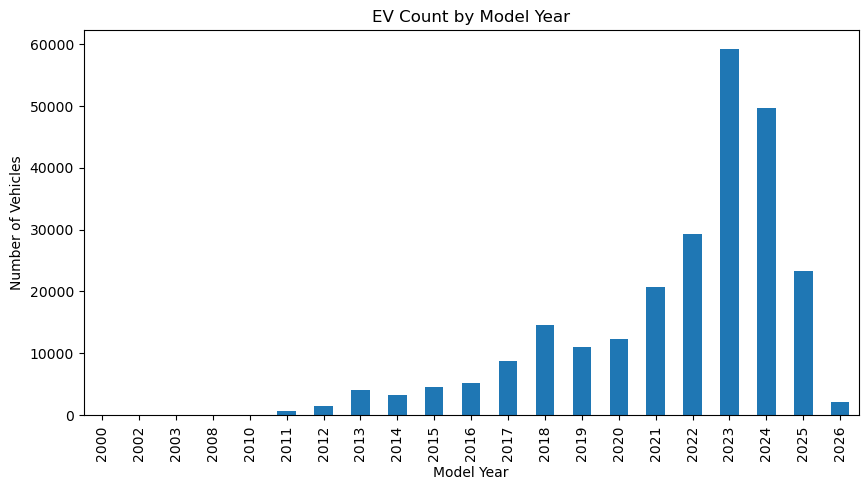

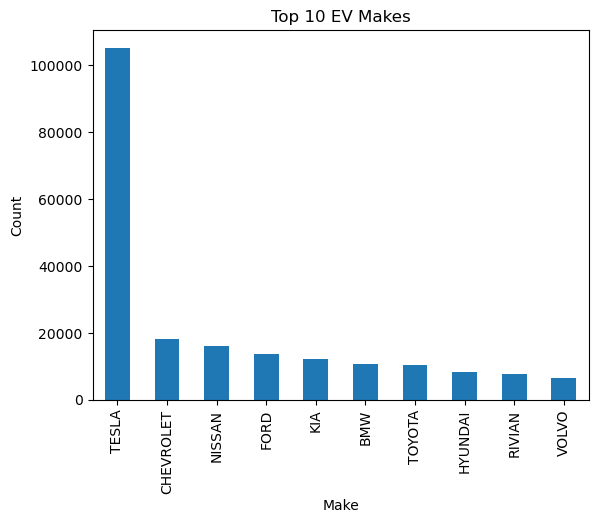

In [7]:
df['Model Year'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), title='EV Count by Model Year')
plt.ylabel("Number of Vehicles")
plt.show()

df['Make'].value_counts().head(10).plot(kind='bar', title='Top 10 EV Makes')
plt.ylabel("Count")
plt.show()


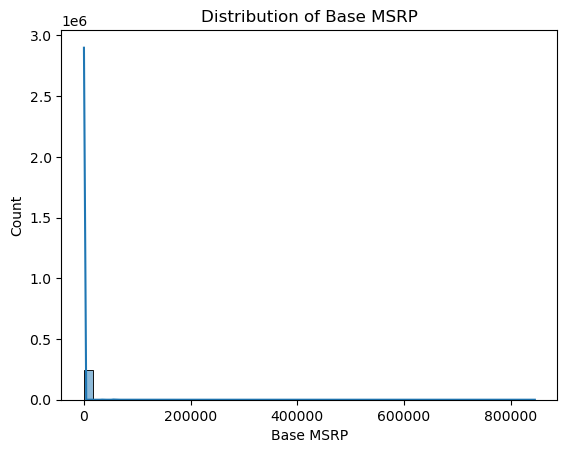

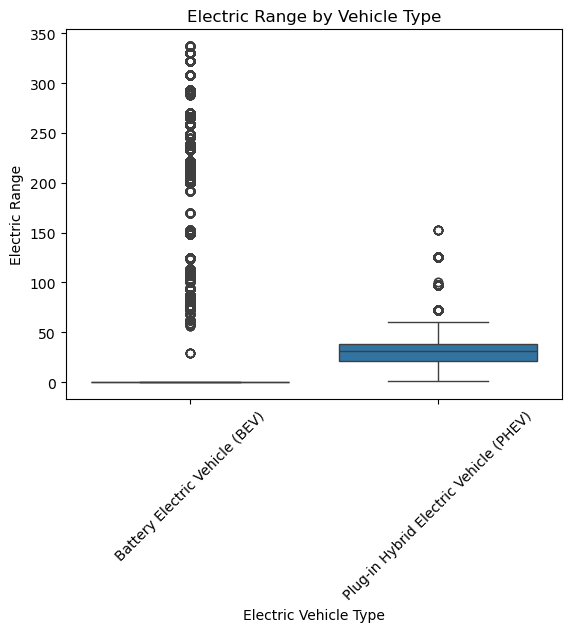

In [8]:
sns.histplot(df['Base MSRP'], bins=50, kde=True)
plt.title('Distribution of Base MSRP')
plt.show()

sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.xticks(rotation=45)
plt.title('Electric Range by Vehicle Type')
plt.show()


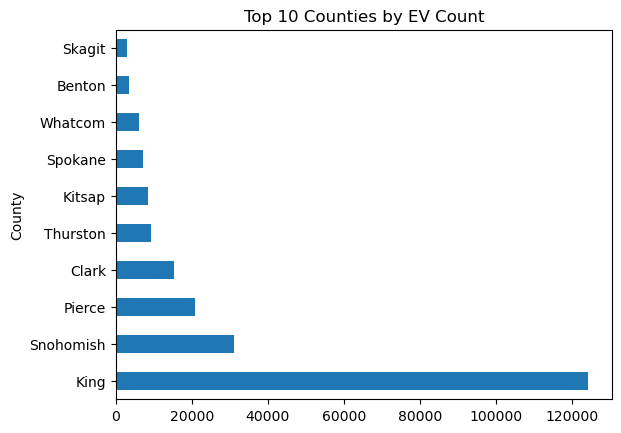

In [9]:
df['County'].value_counts().head(10).plot(kind='barh', title='Top 10 Counties by EV Count')
plt.show()


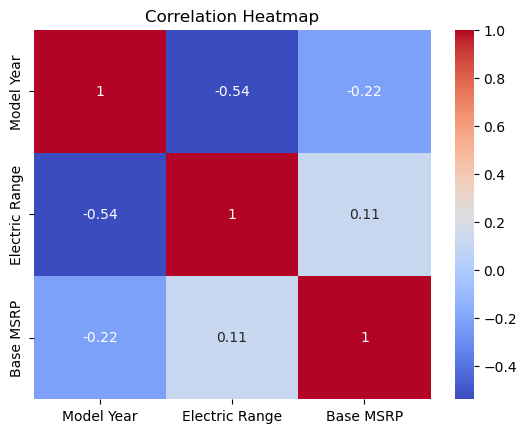

In [10]:
sns.heatmap(df[['Model Year', 'Electric Range', 'Base MSRP']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df[['Base MSRP', 'Model Year']]
y = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.28305058201499167
MSE: 4889.539940335057


## Conclusion

- Most EVs in the dataset are from recent years (2020–2024).
- Tesla dominates the EV market in Washington State.
- A large number of vehicles have an electric range between 0 and 100 miles.
- The linear regression model gives us a rough estimate of range based on MSRP and model year.


## Appendix

- Full code scripts
- Data dictionary
- References (if any)
